# 2. Regression and Classification

Regression and classficiation are two fundamental tasks of supervised Machine Learning where labels
allows us to guide the learning. This notebook reviews more standard approaches to regression and classification.

We provide the fundamental ideas behind

* linear regression and ridge regression
* logistic regression for classification
* decision trees and Random Forests

and apply these techniques to simulated data and a dataset example (wine quality assessment).

Keywords: ```OLS```, ```MSE```, ```Overfittng```, ```Regularisation```, ```np.linalg.inv```, ```sklearn.linear_model.LinearRegression```, ```sklearn.linear_model.Ridge```, ```sklearn.tree.DecisionTreeClassifier```, ```sklearn.linear_model.LogisticRegression```, ```sklearn.ensemble.RandomForestClassifier```, ```sklearn.model_selection.train_test_split```

***

#### We start by fixing a random seed
which controls the generation of (pseudo) random number sequences.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123)

#### Note 

that this enables reproducibility of our results even in the presence of "randomness".
For example, the first three runs of the following cell

In [3]:
np.random.random(size=4)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477])

will always produce

1. ```array([0.69646919, 0.28613933, 0.22685145, 0.55131477])```

2. ```array([0.71946897, 0.42310646, 0.9807642 , 0.68482974])```

3. ```array([0.4809319 , 0.39211752, 0.34317802, 0.72904971])```

***

## Standard Linear Regression and Ordinary Least Squares

We assume a linear relationship between true **response** $Y_\text{groundtruth} = Xw$ and **predictors / covariates** $X$. 
However, usually **our observation is not perfect**, i.e. there is some noise additional $\epsilon$. 

A simple linear regression model is then

\begin{equation}
    Y = Xw + \epsilon.
\end{equation}

Let us simulate $N=10$ datapoints with Gaussian noise $\epsilon \sim \mathcal{N}(\mu=0,\sigma=20)$.

In [10]:
np.random.seed(123)

num_datapoints = 10

X = np.random.random(size=num_datapoints)*50
X = np.sort(X).reshape(-1,1)

print(X.shape)
print(X)

w_groundtruth = 10
Y_groundtruth = w_groundtruth*X

epsilon_noise = np.random.normal(loc=0, scale=20.0, size=(num_datapoints,1))

Y = Y_groundtruth + epsilon_noise 

(10, 1)
[[11.34257268]
 [14.30696675]
 [19.60587591]
 [21.15532301]
 [24.04659507]
 [27.56573845]
 [34.24148693]
 [34.82345928]
 [35.97344849]
 [49.03820992]]


A typical objective function is given by the **mean squared error** (MSE) loss

\begin{equation}
    \text{Loss}(w) = \frac{1}{2N} \lVert \epsilon \rVert_2^2 = \frac{1}{2N} \lVert Y - Xw \rVert_2^2 = \frac{1}{2N} \sum_{n=1}^{N} \big( y_n -  x_n \cdot w \big)^2.
\end{equation}

Under certain conditions, the solution to this equation will provide the **best linear (unbiased) estimator** for $w$! We identify the **minimum** through

\begin{equation}
    \nabla  \text{Loss}(w) = X^\top Y - X^\top X w \equiv 0,
\end{equation}

which provides the **ordinary least squares** (OLS) solution

\begin{equation}
    w_\text{OLS} = \left( X^\top X \right)^{-1}X^\top Y.
\end{equation}

In [5]:
XT = np.transpose(X)
XTX_inverse = np.linalg.inv(XT @ X)

w_OLS = XTX_inverse @ XT @ Y

print(f"The solution is given by w_OLS = {w_OLS.squeeze()}.")

The solution is given by w_OLS = 10.375338325958648.


#### Note
* Operator ```@``` provides the matrix multiplication of two numpy array (similar to ```np.matmul```)
* Function ```numpy.array.squeeze()``` removes all dimensions of size ```1``` from a NumPy array, i.e.
```python
In: print(w_OLS.shape) 
Out: (1, 1)

In: print(w_OLS)
Out: [[10.04673211]]

In: print(w_OLS.squeeze())
Out: 10.046732109803889
```

Let's provide some predictions $Y_\text{OLS}$ based on this solution.

In [6]:
Y_OLS = w_OLS * X

With this, we can calculate the **coefficient of determination** $R^2$ ([Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination)) through

In [7]:
Rsquared = 1 - np.sum((Y - Y_OLS)**2) / np.sum((Y - np.mean(Y))**2)
print(Rsquared)

0.965593882960831


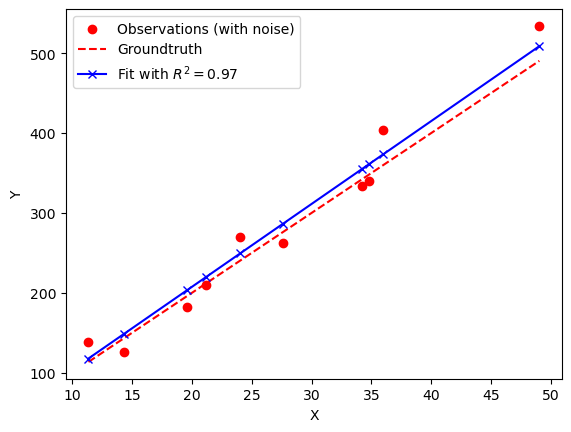

In [8]:
plt.scatter(X, Y, color='red', label='Observations (with noise)')
plt.plot(X, Y_groundtruth, color='red', linestyle='dashed', label=f'Groundtruth')
plt.plot(X, Y_OLS, marker='x', color='blue', label=f'Fit with $R^2={Rsquared:.2f}$')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

What happens if you have more "flexible models" at your disposal? In the following, we try to fit our observed 
responses $Y$ with a polynomial model of the form 

\begin{align}
    Y &= X_\text{poly}w + \epsilon \\ 
    &= x \cdot w_1 + x^2 \cdot w_2 + x^3 \cdot w_3 + ... + x^7 \cdot w_7 + x^8 \cdot w_8 + \epsilon
\end{align}

and create a hundred test datapoints.

In [9]:
X_poly = np.hstack((X, X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8))
print(X_poly.shape)

X_test = np.linspace(10,50,100).reshape(-1, 1)
X_test = np.hstack((X_test, X_test ** 2, X_test ** 3, X_test ** 4, X_test ** 5, X_test ** 6, X_test ** 7, X_test ** 8))

(10, 8)


Let's see the OLS solution for that case:

Solution w_OLS = [-7.51130753e+02  2.57966644e+02 -3.52218133e+01  2.52026936e+00
 -1.02565199e-01  2.38549629e-03 -2.94929359e-05  1.50136544e-07]


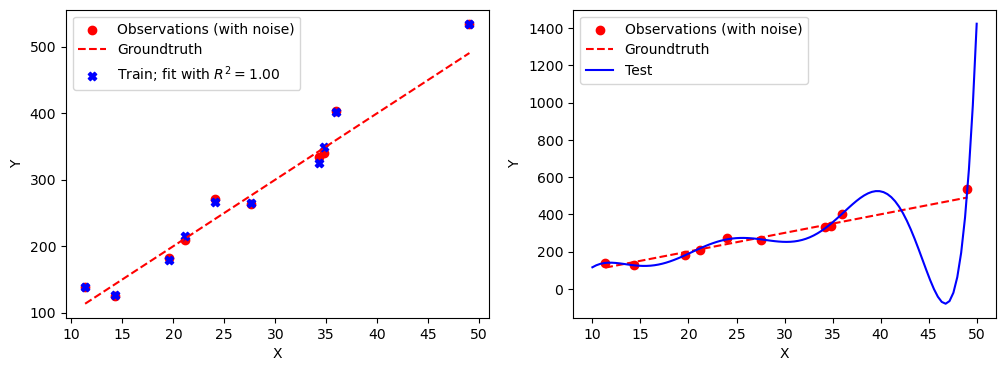

In [11]:
XT = np.transpose(X_poly)
XTX_inverse = np.linalg.inv(XT @ X_poly)

w_OLS = XTX_inverse @ XT @ Y

print(f"Solution w_OLS = {w_OLS.squeeze()}")

Y_OLS = X_poly @ w_OLS
Y_OLS_test = X_test @ w_OLS

Rsquared = 1 - np.sum((Y - Y_OLS)**2) / np.sum((Y - np.mean(Y))**2)

fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].scatter(X, Y, marker='o', color='red', label='Observations (with noise)')
axs[0].plot(X, Y_groundtruth, color='red', linestyle='dashed', label=f'Groundtruth')
axs[0].scatter(X, Y_OLS, color='blue', marker='X', label=f'Train; fit with $R^2={Rsquared:.2f}$')

axs[1].scatter(X, Y, marker='o', color='red', label='Observations (with noise)')
axs[1].plot(X, Y_groundtruth, color='red', linestyle='dashed', label=f'Groundtruth')
axs[1].plot(X_test[:,0], Y_OLS_test, color='blue', label=f'Test')

axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()

plt.show()

***

## Ridge Regression

Ridge regression adds an additional assumption on (the distribution of) weights $w$. We rewrite the loss as

\begin{equation}
    \text{Loss} (w) = \frac{1}{2N} \lVert Y - Xw \rVert_2^2 {\color{red}{+ \frac{1}{2} \lambda' \lVert w \rVert^2_2}} = \frac{1}{2N} \sum_{n=1}^{N} \left( y_n - x_n \cdot w \right)^2 {\color{red}{+ \frac{1}{2} \lambda' \sum_{i=1}^{d_{x}} w_i^2}}
\end{equation}

where the minimisation also takes into account the value (norm) of the weights $w_i$. Here, $d_x$ indicates the dimensions of our input $X$, e.g. $d_x=8$ in the case of the polynomial model above. The solution to this minimisation is given by

\begin{equation}
    w_\text{ridge} = \left({\color{red}{\lambda \mathbb{1}_{d_x} +}} X^\top X \right)^{-1} X^\top Y.
\end{equation}

Let's see what happens with this additional term:

In [12]:
lambda_ridge = 100000

XT = np.transpose(X_poly)
XTX_ridge_inverse = np.linalg.inv(XT @ X_poly + lambda_ridge * np.identity(X_poly.shape[1]))

w_ridge = XTX_ridge_inverse @ XT @ Y

print(f"Solutions: \n w_OLS = \t {w_OLS.squeeze()},\n w_ridge = \t {w_ridge.squeeze()}.")

Solutions: 
 w_OLS = 	 [-7.51130753e+02  2.57966644e+02 -3.52218133e+01  2.52026936e+00
 -1.02565199e-01  2.38549629e-03 -2.94929359e-05  1.50136544e-07],
 w_ridge = 	 [ 2.47873294e-03  1.58957362e-02  6.22240854e-02  4.74477828e-03
 -7.57974781e-04  3.01976405e-05 -4.90619858e-07  2.84986667e-09].


0.9604147033799222


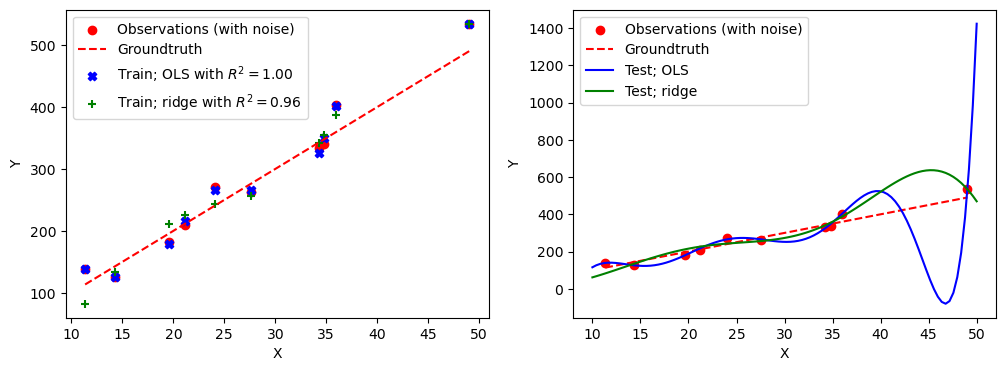

In [13]:
Y_ridge = X_poly @ w_ridge 
Y_ridge_test = X_test @ w_ridge 

Rsquared_ridge = 1 - np.sum((Y - Y_ridge)**2) / np.sum((Y - np.mean(Y))**2)

print(Rsquared_ridge)

fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].scatter(X, Y, marker='o', color='red', label='Observations (with noise)')
axs[0].plot(X, Y_groundtruth, color='red', linestyle='dashed', label='Groundtruth')
axs[0].scatter(X, Y_OLS, color='blue', marker='X', label=f'Train; OLS with $R^2={Rsquared:.2f}$')
axs[0].scatter(X, Y_ridge, color='green', marker='+', label=f'Train; ridge with $R^2={Rsquared_ridge:.2f}$')

axs[1].scatter(X, Y, marker='o', color='red', label='Observations (with noise)')
axs[1].plot(X, Y_groundtruth, color='red', linestyle='dashed', label='Groundtruth')
axs[1].plot(X_test[:,0], Y_OLS_test, color='blue', label=f'Test; OLS')
axs[1].plot(X_test[:,0], Y_ridge_test, color='green', label=f'Test; ridge')


axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()

plt.show()

#### Note
that the additional term $\lambda \lVert w \rVert^2_2 = \lambda \sum_{i=1}^{d_{x}=8} w_i^2$ 
in the loss function enables deviation from the observed noisy datapoints. That is models (i.e.
weights $w_i$) which too closely *overfit* to the noisy observations are penalised. Parameter $\lambda$
serves as a **penalty factor** biasing towards *simpler* models which **reduce overfitting**.

Generally, having terms in your loss function favouring simpler models is referred to as **regularisation** ([Wikipedia](https://en.wikipedia.org/wiki/Regularization_(mathematics))). Highly-flexible models (like the blue curve in the next figure) allow fitting observations (red dots) arbitrary well. Typically, we prefer to choose simpler models (like the green curve) which usually provide better predictions to new, unseen data (**generalisation**). 

<center><img src="images/Regularisation.png" alt="Regularistation" width="200"/> <br> Image source: <a href="https://en.wikipedia.org/wiki/Regularization_(mathematics)#/media/File:Regularization.svg">Wikipedia</a> <br> </center>

***

## Using scikit-learn for Regression

You don't need to do all the work yourself! ```scikit-learn``` offers you the required functionality with the functions [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)!

In [14]:
from sklearn.linear_model import LinearRegression, Ridge

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X,Y)

LinearRegression(fit_intercept=False)

#### Note 
that we used ```fit_intercept=False``` because we chose to neglect on off-set / intercept $b$ on the y-axis.
That is, we consider $Y = Xw + b + \epsilon$ with $b=0$, which simplifies writing the equations out.

```linreg``` is the linear fit which provides you the same OLS solution as seen above. 

In [15]:
w_OLS_sk = linreg.coef_
Y_OLS_sk = linreg.predict(X)
Rsquared_sk = linreg.score(X,Y)

print(f"w_OLS_sk = {w_OLS_sk.squeeze()}, Rsquared_sk = {Rsquared_sk}")

w_OLS_sk = 10.375338325958642, Rsquared_sk = 0.965593882960831


We can do the same for the ridge regression case.

In [17]:
ridgereg = Ridge(alpha=10, fit_intercept=False)
ridgereg.fit(X,Y)

w_ridge_sk = ridgereg.coef_
Y_ridge_sk = ridgereg.predict(X)
Rsquared_ridge_sk = ridgereg.score(X,Y)

print(f"w_ridge_sk = {w_ridge_sk.squeeze()}, Rsquared_ridge_sk = {Rsquared_sk}")

w_ridge_sk = 9.293151038782826, Rsquared_ridge_sk = 0.965593882960831


***

## Logistic Regression for Classification

Next, we consider binary classification where our data falls into one of two classes which we will denote
with class labels $Y=0$ (class 1) and $Y=1$ (class 2). Let's assume that observations of 
class 2 occur with an unkown probability of $p_2$. As we only have to classes,
the probablity for class 1 is $p_1 = 1 - p_2$. A natural choice in such a setting is the **Bernoulli distribution** 
([Wikipedia](https://en.wikipedia.org/wiki/Bernoulli_distribution)) with probability (mass) function

\begin{equation}
    p(Y) = p_2^Y p_1^{1-Y} = p_2^Y (1-p_2)^{1-Y}.
\end{equation}

The idea of logistic regression is to approximate the ratio of the two class probabilites with an exponential 
function of the form

\begin{equation}
    \frac{p_2}{p_1} = \exp (x_1 \cdot w_1 + x_2 \cdot w_1\cdot w_2 + ... + x_{d_x} \cdot w_{d_x}) = \exp (Xw),
\end{equation}

so again a linear model! Note that we can write this as

\begin{equation}
     \exp (Xw) = \frac{p_2}{1-p_2} \Rightarrow  p_2 = \frac{1}{1+\exp (-Xw)}.
\end{equation}

This is the **logistic function**. In order to identify the weights $w$, i.e. a matching model, we use the **logistic loss** (also known as **negative log-likelihood** or **cross entropy loss**, depending on the context)

\begin{equation}
    \text{Loss}(w) = - Y \log p_2 - (1-Y) \log (1-p_2) = - \sum_{n=1}^{N} y_n \log \frac{1}{1+\exp (-x_n \cdot w)} + (1-y_n) \log \Big(1-\frac{1}{1+\exp (-x_n \cdot w)}\Big)
\end{equation}

for $N$ datapoints. 

Let's create a simple binary classification problem with $50$ datapoints.

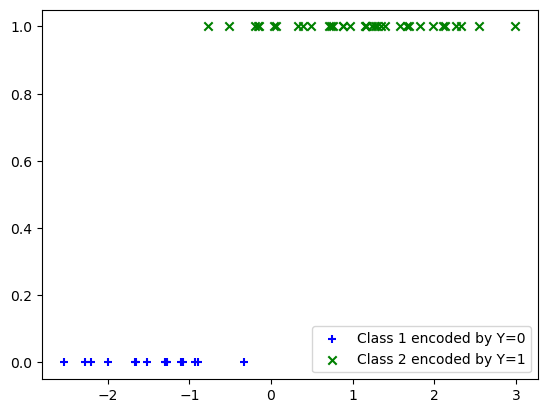

In [18]:
from sklearn.datasets import make_classification

num_datapoints = 50

X, Y = make_classification(n_samples=num_datapoints, 
                           n_features=1, 
                           n_informative=1,
                           n_redundant=0, 
                           n_classes=2, 
                           n_clusters_per_class=1, 
                           weights=[0.3, 0.7],
                           random_state=0)

plt.scatter(X[Y == 0], Y[Y == 0], color='blue', marker='+', label='Class 1 encoded by Y=0')
plt.scatter(X[Y == 1], Y[Y == 1], color='green', marker='x', label='Class 2 encoded by Y=1')
plt.legend()
plt.show()

Here we directly use ```scikit-learn``` function [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

Using the method ```predict_proba``` allows predicting the probability 
$p(Y=1)$ for class 2 of our logistic regression model ```logreg```.

In [20]:
X_logreg = np.linspace(-2, 2, 1000).reshape(-1, 1)
Y_logreg = logreg.predict_proba(X_logreg)

Let's plot the result:

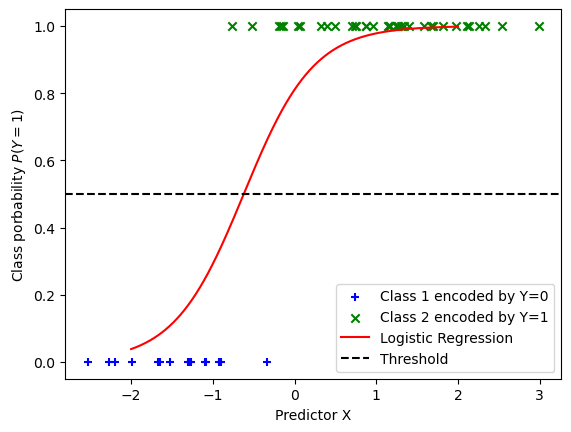

In [21]:
plt.scatter(X[Y == 0], Y[Y == 0], color='blue', marker='+', label='Class 1 encoded by Y=0')
plt.scatter(X[Y == 1], Y[Y == 1], color='green', marker='x', label='Class 2 encoded by Y=1')
plt.plot(X_logreg[:, 0], Y_logreg[:, 1], color='red', label='Logistic Regression')
plt.axhline(0.5, color='black', linestyle='--', label='Threshold')

plt.xlabel('Predictor X')
plt.ylabel(r'Class porbability $P(Y=1)$')
plt.legend()
plt.show()

***

## Decision Trees and Random Forests

An more classical approach to classification problems are decision trees. 
In the next example, we will try to classify premium red wine from their 
measured propertes / features which serve as the predictors / covariates. 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

# quality_threshold = 6
quality_threshold = 5

wine_data['premium'] = wine_data['quality'] > quality_threshold

wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,premium
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


We focus on the quality assessment.

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


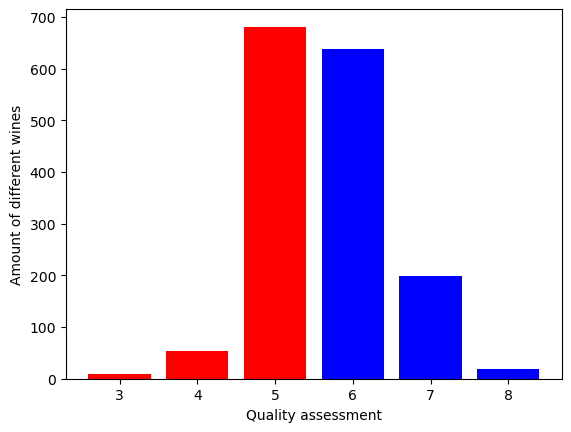

In [44]:
quality_counts = wine_data['quality'].value_counts()

if quality_threshold == 5:
    colours = ['red','blue','blue','red','blue','red']
elif quality_threshold == 6:
    colours = ['red','red','blue','red','blue','red']

print(quality_counts)
    
plt.bar(quality_counts.index, quality_counts, color=colours)
plt.xlabel('Quality assessment')
plt.ylabel('Amount of different wines')
plt.show()

Perpare the features and target:

In [45]:
target = wine_data['premium'].astype(int)
wine_features = wine_data.drop( ['quality','premium'], axis=1)

print("Shape of wine_features:\t{}\nShape of target:\t{}\n"
      .format(wine_features.shape, target.shape)
     )

target.head(5)

Shape of wine_features:	(1599, 11)
Shape of target:	(1599,)



0    0
1    0
2    0
3    1
4    0
Name: premium, dtype: int64

#### The __Goal__
is to learn a classifier which predicts whether a wine is a premium /
non-premium wine on the basis of the measured wine features.

Select (randomly) a set on which the classifier is 
calibrated / trained on and a test set on which the performance
is assessed. We consider a test set size of 30% of the original data
set.

In [46]:
from sklearn.model_selection import train_test_split

feat_train, feat_test, target_train, target_test = train_test_split(
    wine_features, target, test_size = 0.3, random_state=123)

print("After splitting into train and test sets:\n\n"
      f"Shape of feat_train:\t{feat_train.shape}\nShape of target_train:\t{target_train.shape}\n"
      f"Shape of feat_test:\t{feat_test.shape}\nShape of target_test:\t{target_test.shape}"
     )

After splitting into train and test sets:

Shape of feat_train:	(1119, 11)
Shape of target_train:	(1119,)
Shape of feat_test:	(480, 11)
Shape of target_test:	(480,)


We have a first look on a decision tree and just consider the features 
providing the ```alcohol``` and ```sulphates``` content. We use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

feat_train_subset = feat_train[ ['alcohol','sulphates'] ]

wine_tree = DecisionTreeClassifier(max_depth=2)
wine_tree.fit(feat_train_subset, target_train)

DecisionTreeClassifier(max_depth=2)

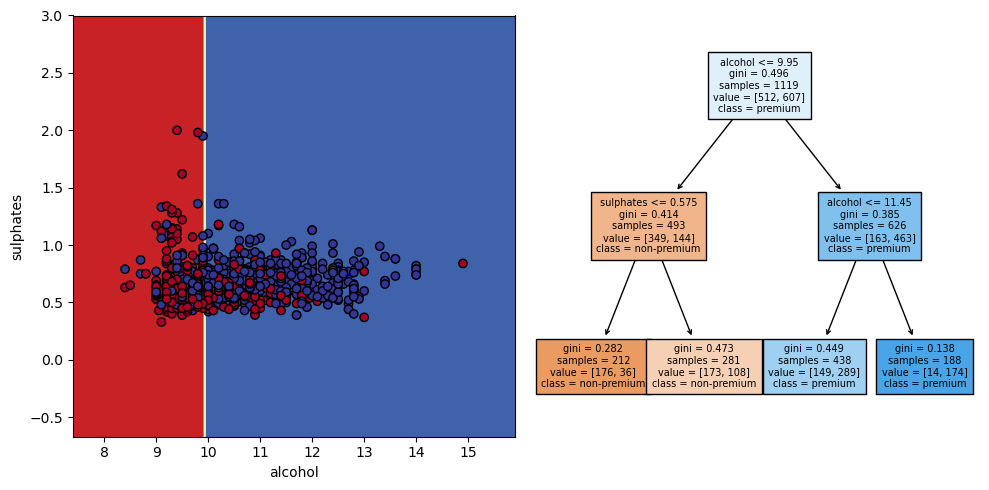

In [48]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

try:
    from sklearn.inspection import DecisionBoundaryDisplay

    display = DecisionBoundaryDisplay.from_estimator(
        wine_tree,
        feat_train_subset,
        cmap='RdYlBu',
        response_method="predict",
        ax=axs[0],
        xlabel='alcohol',
        ylabel='sulphates',
    )
except:
    print("Sorry, the library for plotting the decision " 
          "boundary is currently missing")

plot_tree(wine_tree, max_depth=2, 
          feature_names=['alcohol','sulphates'], 
          class_names=['non-premium','premium'],
          ax=axs[1], fontsize=7, filled = True,
         )


axs[0].scatter(feat_train['alcohol'], feat_train['sulphates'],
               c=target_train, cmap='RdYlBu', edgecolor='black'
              )

plt.tight_layout()                        
plt.show()

#### Note 
that decision trees partition the input space into different regions with 
**decision boundaries** separating different classes, like premium wines 
(blue data / region) and non-premium wines (red data / region)!

Now let's consider the full dataset!

The random forest identified premium / non-premium wines with 70.83333333333334% accuracy!


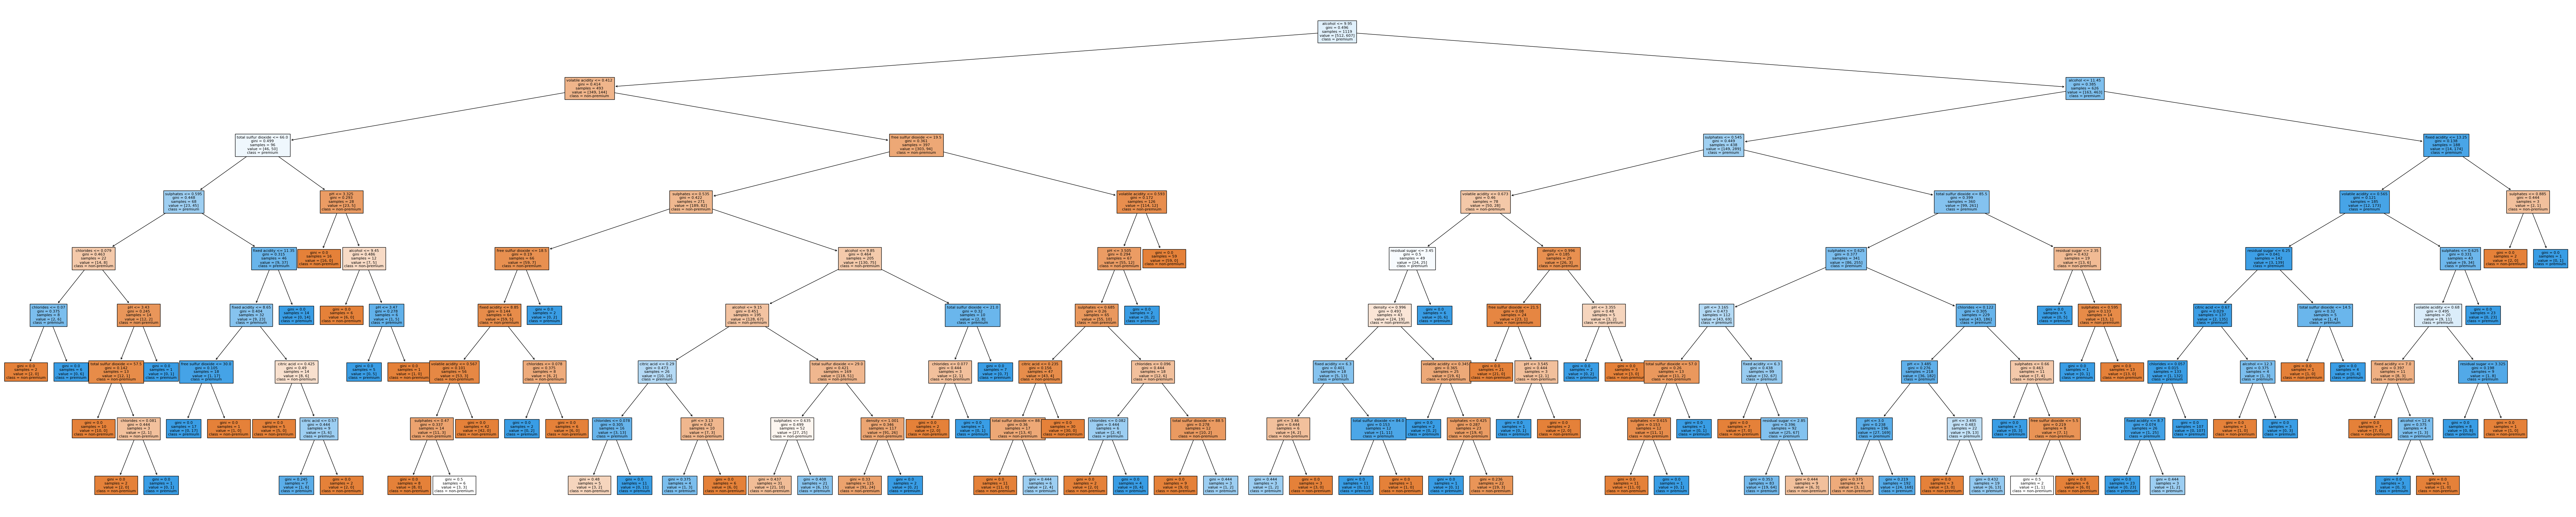

In [49]:
tree_height = 8

wine_tree = DecisionTreeClassifier(max_depth=tree_height)
wine_tree.fit(feat_train, target_train)

correct_pred = wine_tree.predict(feat_test) == target_test

correct = correct_pred.value_counts()

accuracy = (correct[True] / (correct[True] + correct[False]))*100
print(f"The random forest identified premium / non-premium wines with {accuracy}% accuracy!")

fig, ax = plt.subplots(1,1, figsize=(100,20))

plot_tree(wine_tree, 
          feature_names=wine_features.columns.to_list(), 
          class_names=['non-premium','premium'],
          filled = True,
          ax=ax,
          fontsize=8
         )
plt.show()

#### You can learn more on decision trees 
from [scikit-learn](https://scikit-learn.org/stable/modules/tree.html) and
the [mathematical criteria](https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation) for the decision splits.

#### **Random Forests**
are now very powerful machine learning methods which build on decision trees. 
Random Forests construct a multitude of decision trees like the one above. 
The individual decision trees provide a classification result and by majority 
voting the final classification is obtained. We use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [50]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
tree_height = 8

wine_forest = RandomForestClassifier(n_estimators=num_trees, 
                                       max_depth=tree_height, 
                                       random_state=123)
wine_forest.fit(feat_train, target_train)

RandomForestClassifier(max_depth=8, random_state=123)

In [51]:
correct_pred = wine_forest.predict(feat_test) == target_test

correct = correct_pred.value_counts()

accuracy = (correct[True] / (correct[True] + correct[False]))*100
print(f"The random forest identified premium / non-premium wines with {accuracy}% accuracy!")

The random forest identified premium / non-premium wines with 78.125% accuracy!


#### That's a great accuracy! But
let's check what is actually predicted wrongly:

In [52]:
rel_incorrect_pred = target_test[correct_pred == False].value_counts() / target_test.value_counts()

print(f"Incorrect predictions by premium quality:\n{rel_incorrect_pred}")
print(f"\nRatio of premium / non-premium wines in test set:\n{target_test.value_counts(normalize=True)}")      
print(f"\nRatio of premium / non-premium wines in train set:\n{target_train.value_counts(normalize=True)}")      

Incorrect predictions by premium quality:
premium
0    0.275862
1    0.165323
Name: count, dtype: float64

Ratio of premium / non-premium wines in test set:
premium
1    0.516667
0    0.483333
Name: proportion, dtype: float64

Ratio of premium / non-premium wines in train set:
premium
1    0.542449
0    0.457551
Name: proportion, dtype: float64


You can still plot one of the trees!

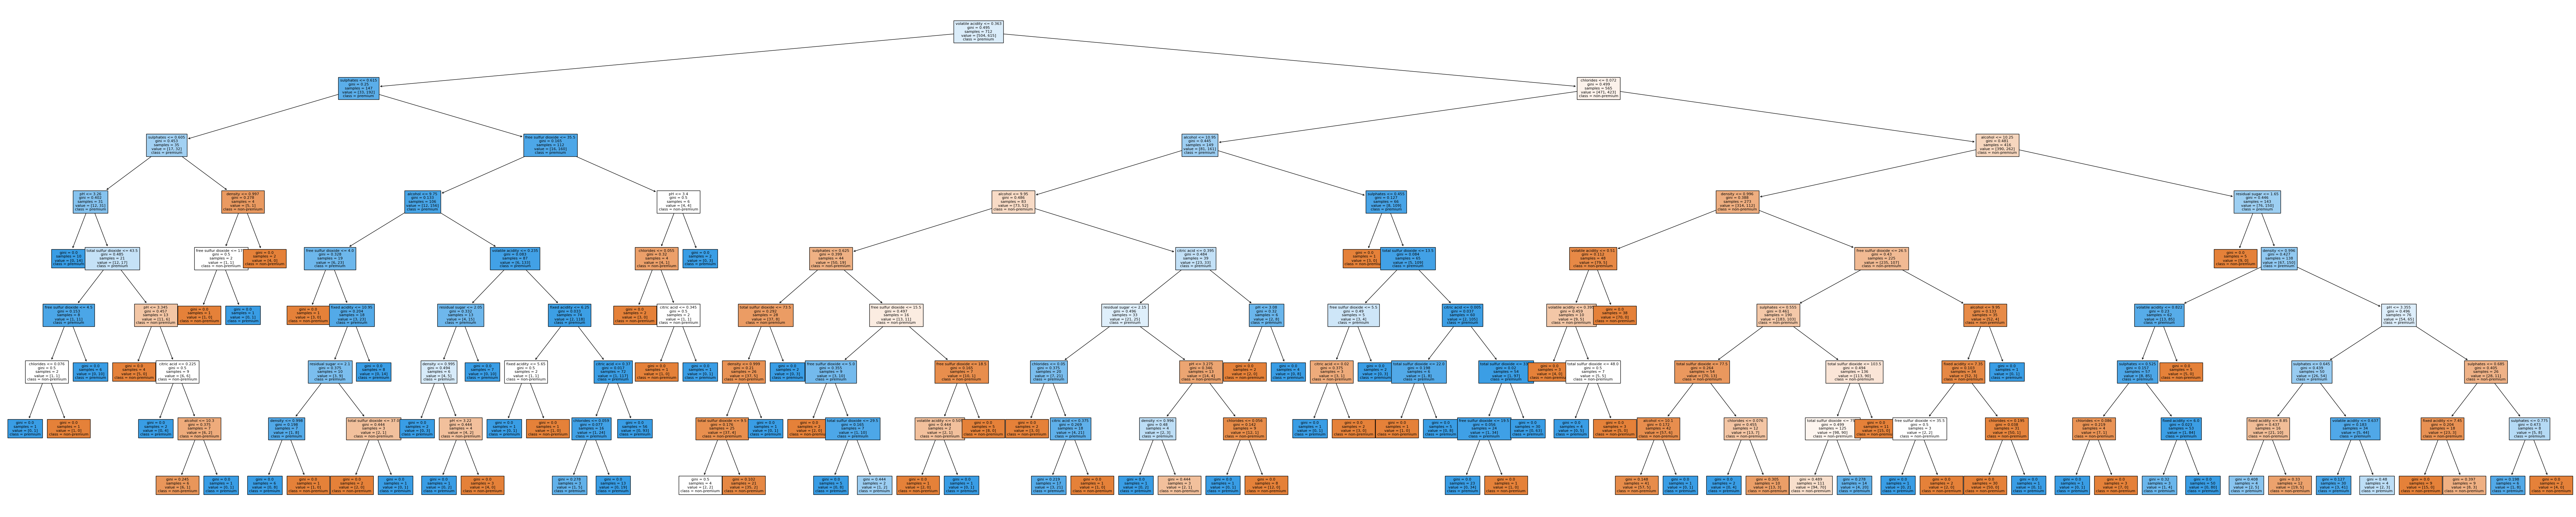

In [53]:
single_tree = wine_forest.estimators_[5]


fig, ax = plt.subplots(1,1, figsize=(100,20))

plot_tree(single_tree, 
          feature_names=wine_features.columns.to_list(), 
          class_names=['non-premium','premium'],
          filled = True,
          ax=ax,
          fontsize=8
         )

plt.show()

However, this is less insightful, as the decision is made by vote of many (different) trees!
Still, we can study the **feature importance score**:

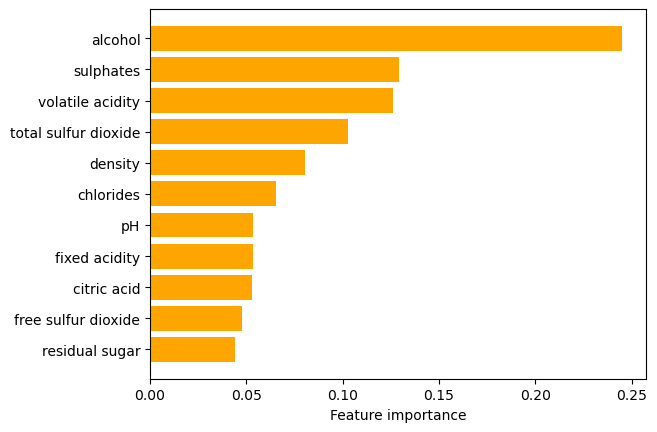

In [54]:
feature_scores = wine_forest.feature_importances_
feature_names = list(wine_features.columns)

important_features = pd.Series(feature_scores, index=feature_names).sort_values()

plt.barh(important_features.index, important_features, color='Orange')
plt.xlabel('Feature importance')
plt.show()

### How to address imbalanced datasets?

As we have seen with Random Forests, looking only at the accuracy in imbalanced datasets 
can deceive. There are different approaches to rectify this problem; find the following
link different [resampling strategies for imbalanced datasets](https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets).


### How to tune hyperparameters? 

A particular challenge with more advanced machine learning techniques is the 
choice of hyperparameters like ```max_depth``` / ```tree_height``` for
decision trees and random forests. Typically, one attempts to define a reasonable 
scope for the range of different hyperparameters and identify more suitable values
based on the **validation set** performance.

There exist tools which allow you an automated way to perform hyperparameter search. 
Check out for example this scikit-learn documentation on [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html) and an [example for a random forest](https://scikit-learn.org/stable/modules/grid_search.html#choosing-a-resource).

***

## Exercise Section

(1.) In this exercise, we train a ```Ridge``` regressor for predicting the ```quality``` values on the test set ```feat_test```. 
First, load the following cell:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

ex_target = wine_data['quality']
ex_features = wine_data.drop(['quality'], axis=1)

feat_train, feat_test, target_train, target_test = train_test_split(
    ex_features, ex_target, test_size = 0.3, random_state=123)

In [56]:
feat_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.400000
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.800000


In [57]:
target_train.head(5)

374     6
800     5
1441    6
1269    8
691     5
Name: quality, dtype: int64

Put your result in the next cell and use ```ex_pred_ridge``` for the predicted quality values.

In [ ]:
from sklearn.linear_model import Ridge

# Fill in

ex_pred_ridge = # Fill in

Execute the next cell to save the results in a summary data frame.

In [ ]:
target_test = target_test.to_frame()
target_test['Ridge_predicted_quality'] = np.around(ex_pred_ridge, decimals=2)
target_test['Ridge_absolut_deviation'] = abs(target_test['quality'] - target_test['Ridge_predicted_quality'])
target_test

(2.) You can create a Random Forest not only for classification, but also regression. Make use of the ```scikit-learn``` method

In [ ]:
from sklearn.ensemble import RandomForestRegressor

to make predictions on the wine quality based on the other features / predictors. Load the previous cell
and train a the ```RandomForestRegressor``` for predicting the quality values on the test set ```feat_test```. Put your result in the next cell and use ```ex_pred_RF``` for the predicted quality values.

Hint: You might want to revisit the steps for RF classification we saw above.

In [ ]:
num_trees = 100
tree_height = 8

# Fill in

ex_pred_RF = # Fill in

In [ ]:
target_test['RF_predicted_quality'] = np.around(ex_pred_RF, decimals=2)
target_test['RF_absolut_deviation'] = abs(target_test['quality'] - target_test['RF_predicted_quality'])
target_test

Finally, compare how the Random Forest and ridge regressor performed in comparison.
For this, just execute the next cell.

In [ ]:
RF_pred_MSE = (target_test['RF_absolut_deviation']**2).mean()
Ridge_pred_MSE = (target_test['Ridge_absolut_deviation']**2).mean()

print(f"Mean squared error of RandomForestRegressor: {RF_pred_MSE:.2f}")
print(f"Mean squared error of Ridge: {Ridge_pred_MSE:.2f}")

***

## Proposed Solutions

(1.) In this exercise, we train a ```Ridge``` regressor for predicting the ```quality``` values on the test set ```feat_test```. 
First, load the following cell:

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

ex_target = wine_data['quality']
ex_features = wine_data.drop(['quality'], axis=1)

feat_train, feat_test, target_train, target_test = train_test_split(
    ex_features, ex_target, test_size = 0.3, random_state=123)

Put your result in the next cell and use ```ex_pred_ridge``` for the predicted quality values.

In [68]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=1.0)
ridgereg.fit(feat_train, target_train)

ex_pred_ridge = ridgereg.predict(feat_test)

print(f"Rsquared_ridgereg: {ridgereg.score(feat_train, target_train)}")

Rsquared_ridgereg: 0.3627326339932849


Execute the next cell to save the results in a summary data frame.

In [69]:
target_test = target_test.to_frame()
target_test['Ridge_predicted_quality'] = np.around(ex_pred_ridge, decimals=2)
target_test['Ridge_absolut_deviation'] = abs(target_test['quality'] - target_test['Ridge_predicted_quality'])
target_test

,quality,Ridge_predicted_quality,Ridge_absolut_deviation
912,6,6.32,0.32
772,5,4.97,0.03
1037,5,4.77,0.23
1106,6,6.57,0.57
263,5,5.51,0.51
...,...,...,...
1466,7,5.57,1.43
580,5,5.32,0.32
1082,6,5.40,0.60
1279,7,6.31,0.69


(2.) You can create a Random Forest not only for classification, but also regression. Make use of the ```scikit-learn``` method

In [70]:
from sklearn.ensemble import RandomForestRegressor

to make predictions on the wine quality based on the other features / predictors. Load the previous cell
and train a the ```RandomForestRegressor``` for predicting the quality values on the test set ```feat_test```. Put your result in the next cell and use ```ex_pred_RF``` for the predicted quality values.

Hint: You might want to revisit the steps for RF classification we saw above.

In [71]:
num_trees = 100
tree_height = 8

ex_forest = RandomForestRegressor(n_estimators=num_trees, max_depth=tree_height, random_state=123)
ex_forest.fit(feat_train, target_train)
ex_pred_RF = ex_forest.predict(feat_test)

print(f"Rsquared_RF: {ex_forest.score(feat_train, target_train)}")

Rsquared_RF: 0.7545065944574373


In [72]:
target_test['RF_predicted_quality'] = np.around(ex_pred_RF, decimals=2)
target_test['RF_absolut_deviation'] = abs(target_test['quality'] - target_test['RF_predicted_quality'])
target_test

,quality,Ridge_predicted_quality,Ridge_absolut_deviation,RF_predicted_quality,RF_absolut_deviation
912,6,6.32,0.32,6.41,0.41
772,5,4.97,0.03,5.10,0.10
1037,5,4.77,0.23,4.98,0.02
1106,6,6.57,0.57,6.44,0.44
263,5,5.51,0.51,5.73,0.73
...,...,...,...,...,...
1466,7,5.57,1.43,5.84,1.16
580,5,5.32,0.32,4.98,0.02
1082,6,5.40,0.60,5.49,0.51
1279,7,6.31,0.69,6.41,0.59


Finally, compare how the Random Forest and ridge regressor performed in comparison.
For this, just execute the next cell.

In [73]:
RF_pred_MSE = (target_test['RF_absolut_deviation']**2).mean()
Ridge_pred_MSE = (target_test['Ridge_absolut_deviation']**2).mean()

print(f"Mean squared error of RandomForestRegressor: {RF_pred_MSE:.2f}")
print(f"Mean squared error of Ridge: {Ridge_pred_MSE:.2f}")

Mean squared error of RandomForestRegressor: 0.34
Mean squared error of Ridge: 0.42
